In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, utils, tree, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn. metrics import confusion_matrix, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Task 1

In [3]:
file = "youth_smoking_drug_data_10000_rows_expanded.csv"
df = pd.read_csv(file)
df['Smoking_Prevalence'] = np.round(df['Smoking_Prevalence'])
df['Drug_Experimentation'] = np.round(df['Drug_Experimentation'])
print("Columns: ", df.columns)
print("Dataset size: ", df.shape)
df.head()
df.info()

Columns:  Index(['Year', 'Age_Group', 'Gender', 'Smoking_Prevalence',
       'Drug_Experimentation', 'Socioeconomic_Status', 'Peer_Influence',
       'School_Programs', 'Family_Background', 'Mental_Health',
       'Access_to_Counseling', 'Parental_Supervision', 'Substance_Education',
       'Community_Support', 'Media_Influence'],
      dtype='object')
Dataset size:  (10000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10000 non-null  int64  
 1   Age_Group             10000 non-null  object 
 2   Gender                10000 non-null  object 
 3   Smoking_Prevalence    10000 non-null  float64
 4   Drug_Experimentation  10000 non-null  float64
 5   Socioeconomic_Status  10000 non-null  object 
 6   Peer_Influence        10000 non-null  int64  
 7   School_Programs       10000 non-null  object 


In [4]:
# Task 2

In [5]:
print("Number of spaces in each column:")
print(df.isnull().sum())

#df.fillna(df.mean(), inplace=True)
#df.fillna("unknown", inplace=True)

#print("Spaces after processing:")
#print(df.isnull().sum())


Number of spaces in each column:
Year                    0
Age_Group               0
Gender                  0
Smoking_Prevalence      0
Drug_Experimentation    0
Socioeconomic_Status    0
Peer_Influence          0
School_Programs         0
Family_Background       0
Mental_Health           0
Access_to_Counseling    0
Parental_Supervision    0
Substance_Education     0
Community_Support       0
Media_Influence         0
dtype: int64


In [6]:
# Task 3

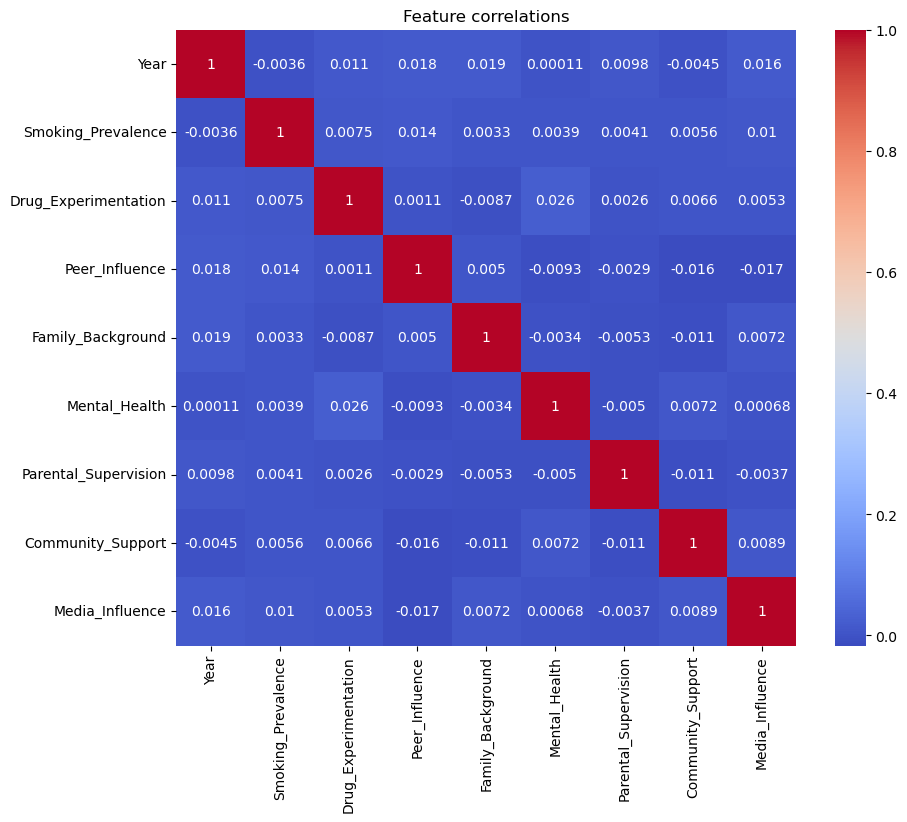

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature correlations")
plt.show()
        

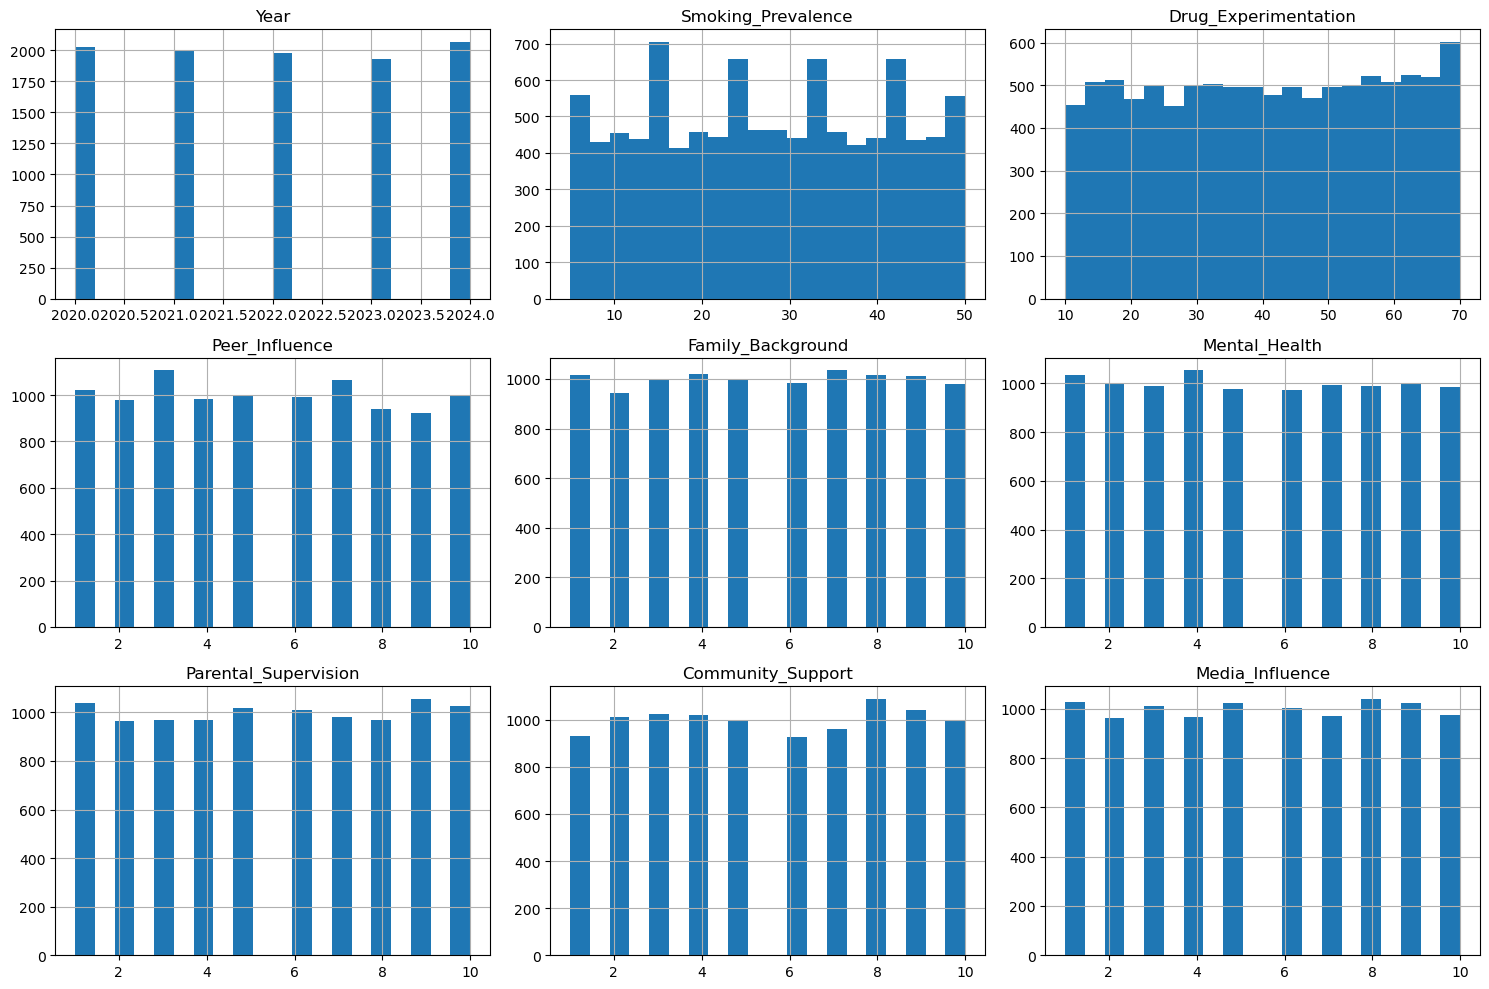

In [8]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


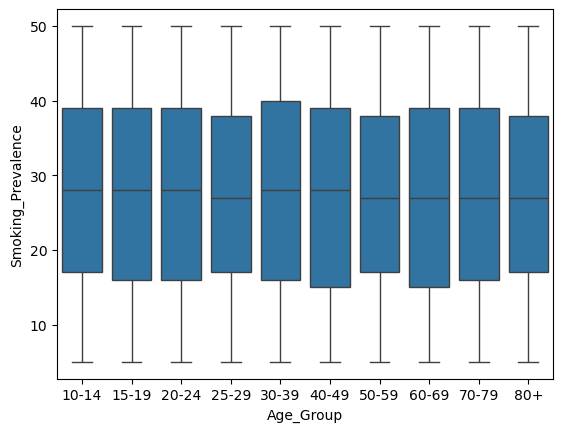

In [9]:
df['Age_Lower_Bound'] = df['Age_Group'].apply(lambda x: int(x.split('-')[0]) if '-' in x else 80)

sorted_age_groups = df['Age_Group'].iloc[df['Age_Lower_Bound'].argsort()].unique()

sns.boxplot(x="Age_Group", y="Smoking_Prevalence", data=df, order=sorted_age_groups)
plt.show()


In [10]:
# Task 4

In [11]:
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

X = df[numeric_columns].drop("Year", axis=1)
y = df["Year"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Task 5

In [13]:
from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)
    
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 


C:\Users\Edel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Edel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
# kNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

        2020       0.21      0.29      0.25       621
        2021       0.22      0.24      0.23       593
        2022       0.18      0.19      0.19       577
        2023       0.19      0.15      0.17       592
        2024       0.19      0.14      0.16       617

    accuracy                           0.20      3000
   macro avg       0.20      0.20      0.20      3000
weighted avg       0.20      0.20      0.20      3000

KNN Confusion Matrix:
[[182 133 114  97  95]
 [154 142 125  89  83]
 [181 114 108  86  88]
 [150 124 118  89 111]
 [182 131 121  97  86]]


In [16]:
# Decision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)


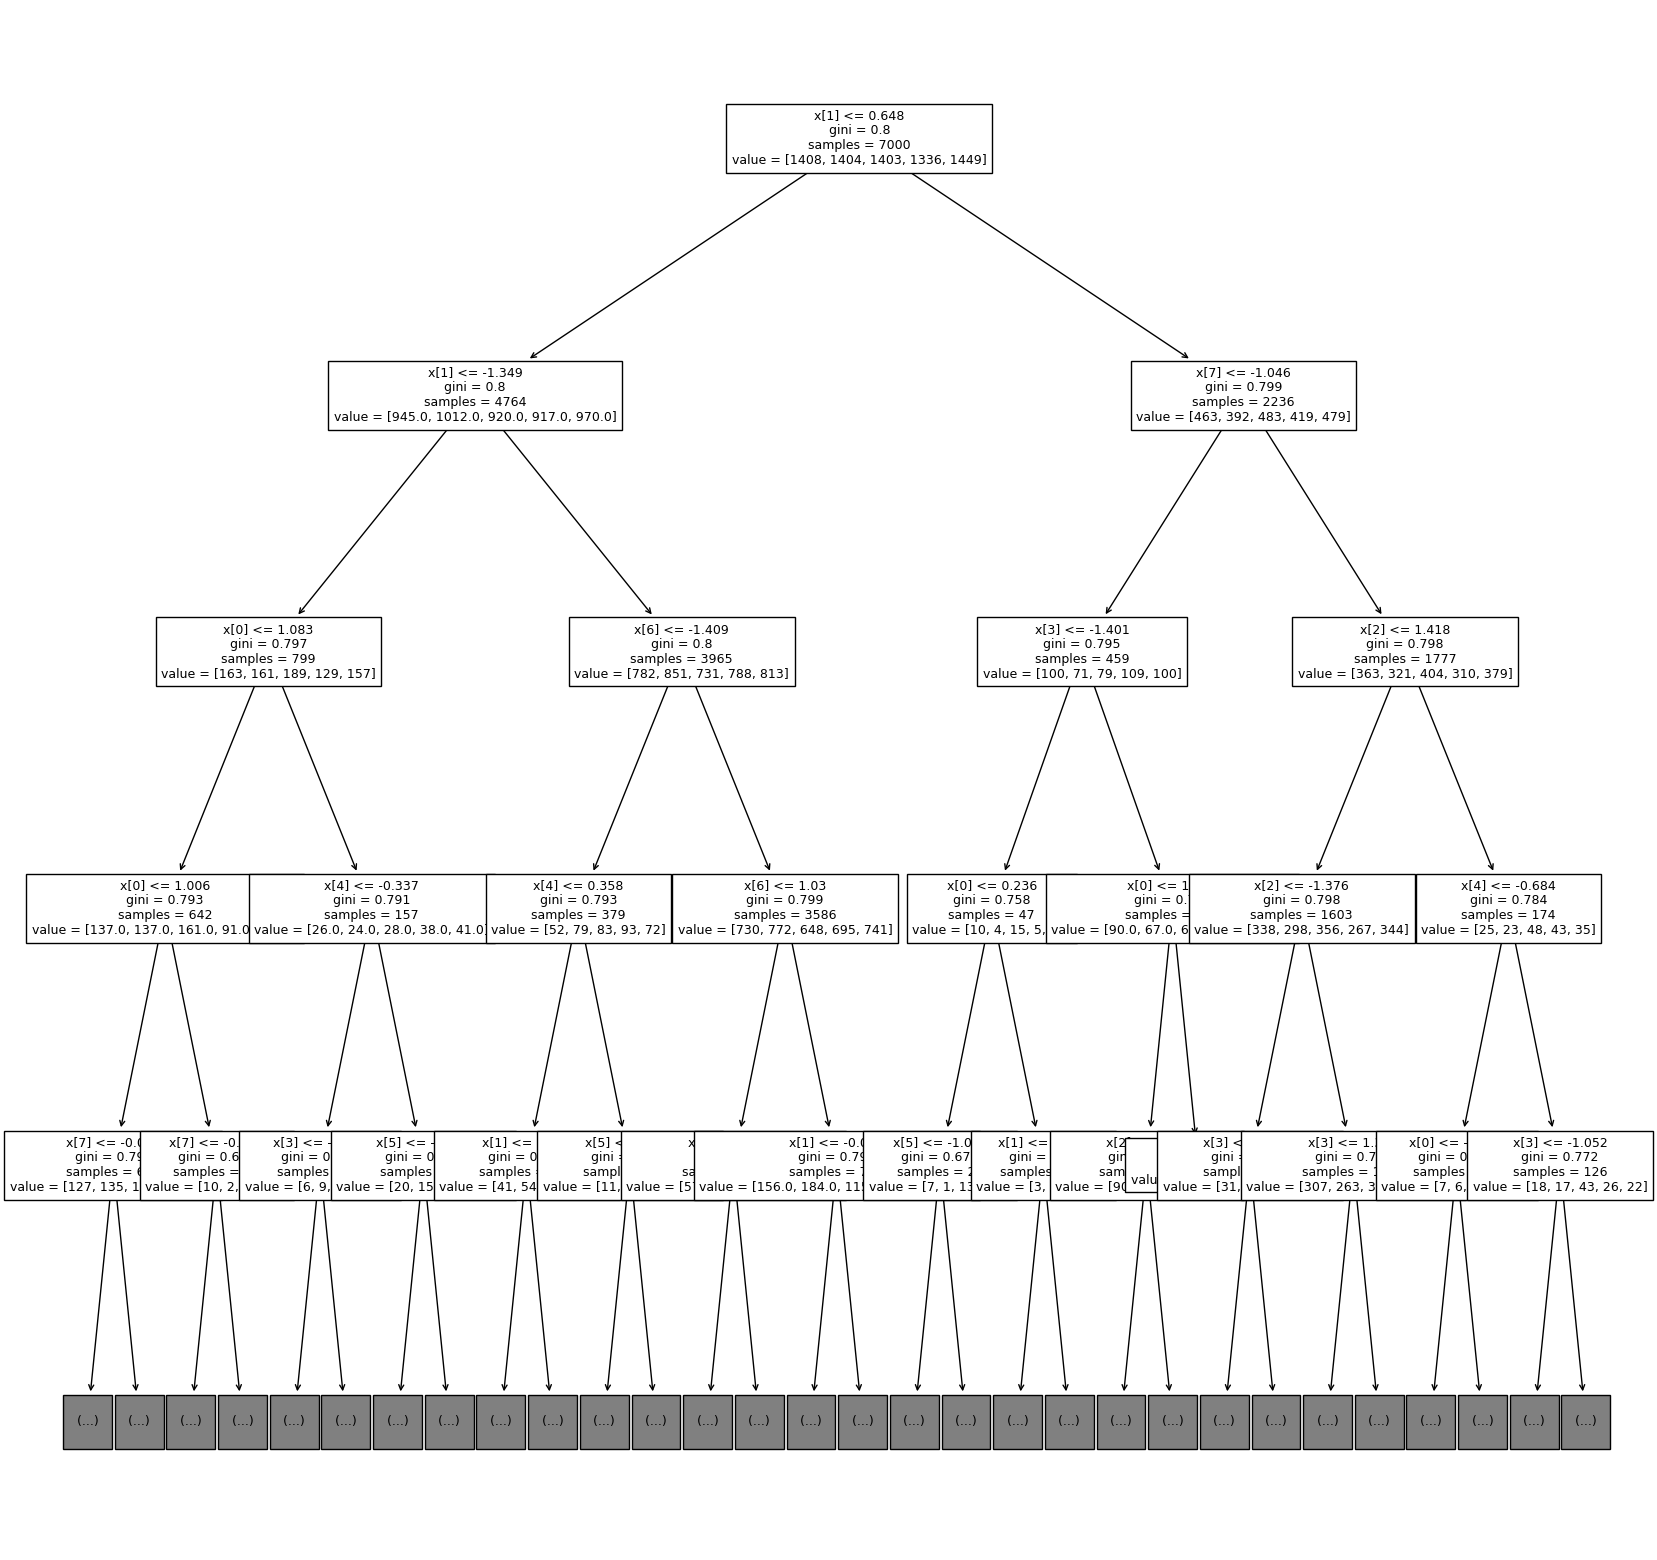

In [18]:
plt.figure(figsize=(20,20))
plot_tree(decision_tree, max_depth=4, fontsize=9)
plt.show()

In [19]:
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        2020       0.18      0.18      0.18       621
        2021       0.22      0.23      0.23       593
        2022       0.18      0.18      0.18       577
        2023       0.17      0.17      0.17       592
        2024       0.19      0.18      0.19       617

    accuracy                           0.19      3000
   macro avg       0.19      0.19      0.19      3000
weighted avg       0.19      0.19      0.19      3000



[[111 134 129 134 113]
 [113 138 114 115 113]
 [116 110 106 117 128]
 [132 117 120 102 121]
 [130 125 121 128 113]]


In [20]:
# SVM

In [21]:
svm_alg = svm.SVC()
svm_alg.fit(X_train, y_train)
y_pred = svm_alg.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        2020       0.18      0.18      0.18       621
        2021       0.18      0.20      0.19       593
        2022       0.17      0.16      0.17       577
        2023       0.19      0.12      0.14       592
        2024       0.21      0.28      0.24       617

    accuracy                           0.19      3000
   macro avg       0.19      0.19      0.19      3000
weighted avg       0.19      0.19      0.19      3000



[[111 138 118  81 173]
 [124 120 128  75 146]
 [128 127  95  73 154]
 [108 133 101  69 181]
 [131 134 106  73 173]]


In [22]:
# Random forest

In [23]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        2020       0.20      0.20      0.20       621
        2021       0.19      0.19      0.19       593
        2022       0.19      0.20      0.19       577
        2023       0.21      0.18      0.19       592
        2024       0.20      0.21      0.21       617

    accuracy                           0.20      3000
   macro avg       0.20      0.20      0.20      3000
weighted avg       0.20      0.20      0.20      3000



[[127 123 119 105 147]
 [119 115 136  97 126]
 [135 119 114 102 107]
 [118 119 111 107 137]
 [126 137 127  96 131]]


In [24]:
# AdaBoost

In [25]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

C:\Users\Edel\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

        2020       0.22      0.19      0.20       621
        2021       0.18      0.18      0.18       593
        2022       0.19      0.20      0.19       577
        2023       0.20      0.16      0.18       592
        2024       0.21      0.27      0.24       617

    accuracy                           0.20      3000
   macro avg       0.20      0.20      0.20      3000
weighted avg       0.20      0.20      0.20      3000



[[115 127 138  93 148]
 [111 105 118 107 152]
 [ 99 109 115  91 163]
 [100 127 112  96 157]
 [105 119 130  95 168]]


In [26]:
# Task 6

In [27]:
# Optimal values for kNN

In [28]:
accuracy = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
print("Best accuracy:",max(accuracy),"when K =",accuracy.index(max(accuracy))+1)

Best accuracy: 0.20633333333333334 when K = 2


In [29]:
knn = KNeighborsClassifier(n_neighbors = accuracy.index(max(accuracy))+1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        2020       0.21      0.37      0.27       621
        2021       0.21      0.30      0.25       593
        2022       0.18      0.20      0.19       577
        2023       0.21      0.11      0.15       592
        2024       0.26      0.05      0.09       617

    accuracy                           0.21      3000
   macro avg       0.21      0.21      0.19      3000
weighted avg       0.21      0.21      0.19      3000



[[227 167 145  59  23]
 [196 178 129  63  27]
 [213 166 115  61  22]
 [205 170 130  67  20]
 [237 171 104  73  32]]


In [30]:
# Optimal values for SVM

In [31]:
k = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
svm_alg = GridSearchCV((svm.SVC()), k)
svm_alg.fit(X_train, y_train)
print(svm_alg.best_params_)

{'C': 0.1, 'gamma': 1}
